In [38]:
%matplotlib notebook
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
import My_functions_v2 as my
import matplotlib.pyplot as plt

In [8]:
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')
omni = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/omni.pkl')

In [25]:
omni = omni.reindex(DNS.index,method='ffill')
DNS = pd.concat([DNS,omni], axis=1)

In [26]:
DNS.loc[:,'dayofyear'] = DNS.index.dayofyear
DNS.loc[:,'UTseconds'] = (DNS.index.hour*60+DNS.index.minute)*60+DNS.index.second

In [27]:
DNS.tail()

,Altitude,Latitude,Longitude,Local_solar_time,Density,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BZ_GSE,DST,F10_Mean,dayofyear,UTseconds
2015-05-19 23:58:40,460614.002142,62.559720,25.656873,1.746363,3.581510e-13,865.0,1.0,3.0,0.7,112.900002,3.6,-15.0,129.650618,139,86320
2015-05-19 23:59:20,460172.415624,60.012314,26.000035,1.780351,4.384790e-13,865.0,1.0,3.0,0.7,112.900002,3.6,-15.0,129.650618,139,86360
2015-05-19 23:59:30,460058.835720,59.375014,26.073717,1.788041,5.401781e-13,865.0,1.0,3.0,0.7,112.900002,3.6,-15.0,129.650618,139,86370
2015-05-19 23:59:40,459944.143172,58.737546,26.143150,1.795448,5.359735e-13,865.0,1.0,3.0,0.7,112.900002,3.6,-15.0,129.650618,139,86380
2015-05-19 23:59:50,459828.416348,58.099916,26.208589,1.802588,5.310026e-13,865.0,1.0,3.0,0.7,112.900002,3.6,-15.0,129.650618,139,86390


In [28]:
DNS.to_csv('/home/simon/Desktop/Bachelor_project/data/DNS_matlab.csv',index=False)

## Correction factors from matlab



In [28]:
cFactors = np.genfromtxt('/home/simon/Desktop/Bachelor_project/data/Correction_factors.csv', delimiter=',')
DNS_adjusted = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

In [29]:
Adjusted_density = DNS.Density*cFactors[:,0]*cFactors[:,1]
DNS_adjusted.loc[:,'Density'] = Adjusted_density.values

In [31]:
DNS_adjusted.head()

,Altitude,Latitude,Longitude,Local_solar_time,Density,Orbit_nr,Hemisphere
2015-01-02 00:00:10,486219.952352,-75.265076,-133.716770,15.026789,7.548359e-13,0.0,-1.0
2015-01-02 00:00:20,486343.326722,-75.888605,-133.288864,15.058092,7.497549e-13,0.0,-1.0
2015-01-02 00:00:30,486461.701815,-76.511095,-132.818524,15.092225,7.387672e-13,0.0,-1.0
2015-01-02 00:00:40,486575.028978,-77.132404,-132.299675,15.129592,7.249351e-13,0.0,-1.0
2015-01-02 00:00:50,486683.264306,-77.752361,-131.725048,15.170678,7.045834e-13,0.0,-1.0


In [44]:
DNS_mean_adjusted=my.orbit_means(DNS_adjusted)
DNS_mean_adjusted=DNS_mean_adjusted.loc[abs(DNS_mean_adjusted.Delta_time-DNS_mean_adjusted.Delta_time.median())<360]

In [45]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')
DNS_mean_adjusted = DNS_mean_adjusted.Density.reindex(Half_orbit.index,method='ffill')
Half_orbit.loc[:,'Density_adj'] = DNS_mean_adjusted.values

In [46]:
Half_orbit.head()

,FAC,FAC_power,Density,Altitude,Orbit_nr,Hemisphere,AP_INDEX,Kp,F10_INDEX,BZ_GSE,DST,F10_Mean,Density_adj
2015-01-02 00:50:50,0.104478,0.284759,6.468488e-13,464222.287865,1.0,1.0,15.0,3.0,141.0,-1.8,-22.0,156.571399,4.490907e-13
2015-01-02 01:37:45,0.139248,0.372618,6.987142e-13,475492.964700,1.0,-1.0,15.0,3.0,141.0,-1.5,-21.0,156.586008,5.746177e-13
2015-01-02 02:24:40,0.113231,0.390340,6.089699e-13,464224.157119,2.0,1.0,15.0,3.0,141.0,-1.9,-16.0,156.600617,4.220675e-13
2015-01-02 03:11:35,0.181961,0.565810,6.858343e-13,475506.057772,2.0,-1.0,4.0,1.0,141.0,-1.8,-7.0,156.615226,5.656725e-13
2015-01-02 03:58:30,0.075313,0.165567,6.237317e-13,464035.397442,3.0,1.0,4.0,1.0,141.0,-1.8,-7.0,156.615226,4.305537e-13


In [47]:
Half_orbit.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_all.pkl')

<IPython.core.display.Javascript object>


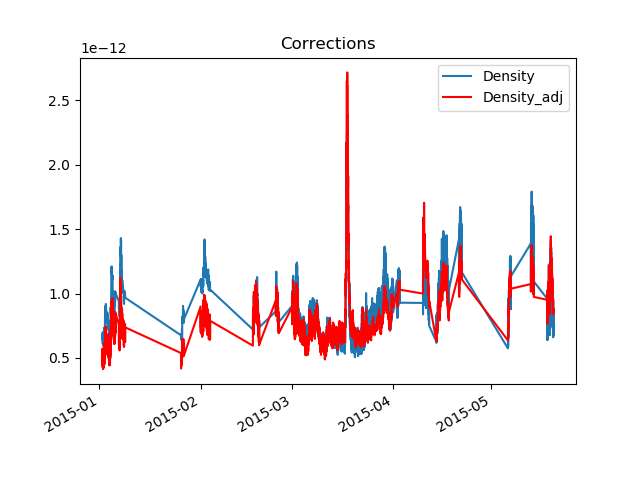

Text(0.5,1,'Corrections')

In [48]:
plt.figure()

p1 = Half_orbit.Density.plot(legend=True)
p2 =  Half_orbit.Density_adj.plot( style='r',legend=True)
plt.title('Corrections')

<IPython.core.display.Javascript object>


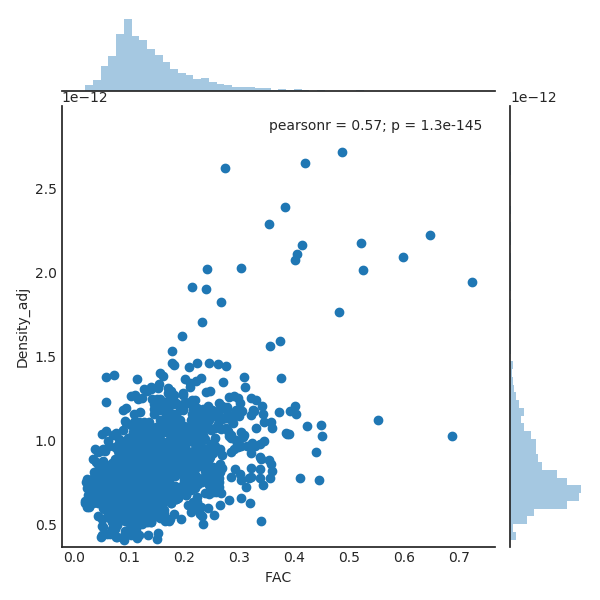

In [40]:
with sns.axes_style('white'):
    sns.jointplot("FAC", 'Density_adj', Half_orbit,ylim=[Half_orbit.Density_adj.min()*0.9,Half_orbit.Density_adj.max()*1.1]);

<IPython.core.display.Javascript object>


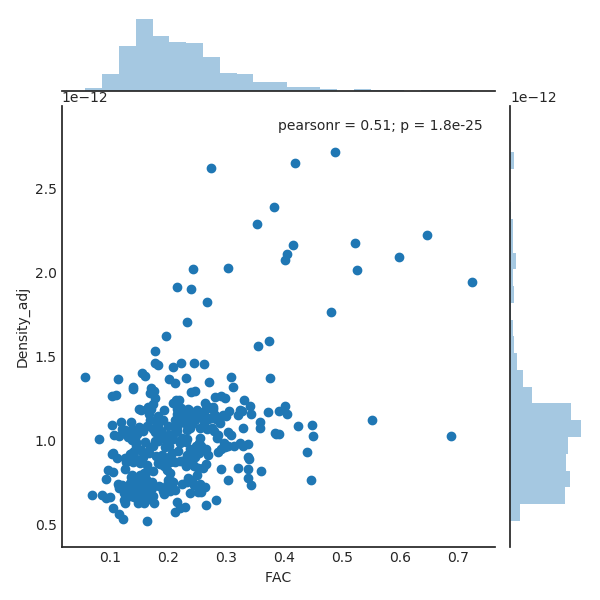

In [49]:
active = Half_orbit[Half_orbit.Kp >= 4]
with sns.axes_style('white'):
    sns.jointplot("FAC", 'Density_adj',active,ylim=[Half_orbit.Density_adj.min()*0.9,Half_orbit.Density_adj.max()*1.1]);